#Decision tree classifier to find the best parameters and performance


In [63]:
import pandas as pd
from sklearn import preprocessing
from IPython.display import display, HTML

df_loan20K=pd.read_csv('Data_Loans_20K.csv', header=0)

print(df_loan20K.shape)

cols_loan20K = df_loan20K.columns

print('Column Name, DataTypes, MissingValues in Loan 20K CSV\n')
for i in cols_loan20K:
    print(i,',', df_loan20K[i].dtype , ',', df_loan20K[i].isnull().any())

##If Yes, fill in missing values by mean values or most frequent nominal values.

df_loan20K["Credit Score"].fillna(df_loan20K["Credit Score"].mean(), inplace=True)
df_loan20K["Annual Income"].fillna(df_loan20K["Annual Income"].mean(), inplace=True)
df_loan20K["Years in current job"].fillna(df_loan20K["Years in current job"].mode().iloc[0], inplace=True)
df_loan20K["Months since last delinquent"].fillna(df_loan20K["Months since last delinquent"].mean(), inplace=True)
df_loan20K["Bankruptcies"].fillna(df_loan20K["Bankruptcies"].mean(), inplace=True)
df_loan20K["Tax Liens"].fillna(df_loan20K["Tax Liens"].mean(), inplace=True)

print('\nColumn Name, DataTypes, MissingValues after filling with Mean and Frequent repeated nominal value in Loan 20K CSV\n')
for i in cols_loan20K:
    print(i,',', df_loan20K[i].dtype , ',', df_loan20K[i].isnull().any())    

# print out and display dataframe as table in HTML
display(HTML(df_loan20K.head(10).to_html()))

# encode labels
y = df_loan20K['Term'] # define label as nominal values
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers #####################################
print(y_encoded)
df_loan20K['Term'] = y_encoded

# Data preprocessing ################################################################################
print('Column Datatypes:\n',df_loan20K.dtypes)

# convert all nominal variables to binary variables
df_num=df_loan20K.copy(deep=True) 
# create new binary columns
df_dummies=pd.get_dummies(df_num[['Loan Status','Years in current job','Home Ownership','Purpose']])
# add them to dataframe
df_num=df_num.join(df_dummies)
# drop original columns
df_num=df_num.drop('Loan Status',axis=1)
df_num=df_num.drop('Years in current job',axis=1)
df_num=df_num.drop('Home Ownership', axis=1)
df_num=df_num.drop('Purpose', axis=1)

# drop extra binary columns, since we only need N-1 binary columns
df_num=df_num.drop('Loan Status_Charged Off', axis=1)
df_num=df_num.drop('Years in current job_10+ years', axis=1)
df_num=df_num.drop('Home Ownership_Own Home', axis=1)
df_num=df_num.drop('Purpose_wedding', axis=1)

# print out and display dataframe as table in HTML
display(HTML(df_num.head(10).to_html()))

(20000, 17)
Column Name, DataTypes, MissingValues in Loan 20K CSV

Loan Status , object , False
Current Loan Amount , int64 , False
Term , object , False
Credit Score , float64 , True
Annual Income , float64 , True
Years in current job , object , True
Home Ownership , object , False
Purpose , object , False
Monthly Debt , float64 , False
Years of Credit History , float64 , False
Months since last delinquent , float64 , True
Number of Open Accounts , int64 , False
Number of Credit Problems , int64 , False
Current Credit Balance , int64 , False
Maximum Open Credit , int64 , False
Bankruptcies , float64 , True
Tax Liens , float64 , True

Column Name, DataTypes, MissingValues after filling with Mean and Frequent repeated nominal value in Loan 20K CSV

Loan Status , object , False
Current Loan Amount , int64 , False
Term , object , False
Credit Score , float64 , False
Annual Income , float64 , False
Years in current job , object , False
Home Ownership , object , False
Purpose , object , Fal

[1 1 1 ... 0 1 1]
Column Datatypes:
 Loan Status                      object
Current Loan Amount               int64
Term                              int32
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit               int64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


In [64]:
# 02. DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

y = df_num['Term']
x = df_num.drop('Term', axis=1)

# by 10-fold cross validation with Gini impurity criterion
clf=DecisionTreeClassifier(criterion='gini', max_depth=10, ccp_alpha = 0.1)
precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
acc=cross_val_score(clf, x, y, cv=10, scoring='accuracy').mean()
pre=cross_val_score(clf, x, y, cv=10, scoring=precision).mean()
rec=cross_val_score(clf, x, y, cv=10, scoring=recall).mean()
print('By 10-fold Cross Validation: accuracy = ',acc, ', precison = ', pre, ', recall = ', rec)


C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedM

By 10-fold Cross Validation: accuracy =  0.71745 , precison =  0.358725 , recall =  0.5


In [65]:
# by 10-fold cross validation with entropy criterion
clf=DecisionTreeClassifier(criterion='entropy', max_depth=10, ccp_alpha = 0.1)
precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
acc=cross_val_score(clf, x, y, cv=10, scoring='accuracy').mean()
pre=cross_val_score(clf, x, y, cv=10, scoring=precision).mean()
rec=cross_val_score(clf, x, y, cv=10, scoring=recall).mean()
print('By 10-fold Cross Validation: accuracy = ',acc, ', precison = ', pre, ', recall = ', rec)

C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedM

By 10-fold Cross Validation: accuracy =  0.71745 , precison =  0.358725 , recall =  0.5


Test score:  [0.7175 0.7175 0.7175 0.7175 0.7175 0.7175 0.7175 0.7175 0.7175 0.717 ]
features:  ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan Status_Fully Paid', 'Years in current job_1 year', 'Years in current job_2 years', 'Years in current job_3 years', 'Years in current job_4 years', 'Years in current job_5 years', 'Years in current job_6 years', 'Years in current job_7 years', 'Years in current job_8 years', 'Years in current job_9 years', 'Years in current job_< 1 year', 'Home Ownership_HaveMortgage', 'Home Ownership_Home Mortgage', 'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House', 'Purpose_Buy a Car', 'Purpose_Debt Consolidation', 'Purpose_Educational Expenses', 'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other', 'Purpo

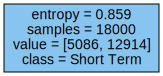

In [66]:
# 03. Visualizing decision trees

from sklearn import tree
import graphviz

clf_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features='auto', ccp_alpha = 0.1)
rst_entropy = cross_validate(clf_entropy, x, y, cv=10, scoring='accuracy', return_estimator=True)
# get fitted trees for each fold
trees_entropy = rst_entropy['estimator']
# print accuracy scores for each fold
scores_entropy = rst_entropy['test_score']
print("Test score: ",scores_entropy)

# select the best model
clf_entropy = trees_entropy[1]

# encode labels
labels = le.inverse_transform([0,1])

print('features: ', x.columns.to_list())
print('labels: ', labels)

# DOT data
dot_data_entropy = tree.export_graphviz(clf_entropy, out_file=None, 
                                feature_names=x.columns.to_list(),  
                                class_names=labels,
                                filled=True)

# Draw graph
graph_entropy = graphviz.Source(dot_data_entropy, format="png") 
graph_entropy.render("MyDecisionTree_entropy_20K")
graph_entropy


Test score:  [0.7175 0.7175 0.7175 0.7175 0.7175 0.7175 0.7175 0.7175 0.7175 0.717 ]
features:  ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan Status_Fully Paid', 'Years in current job_1 year', 'Years in current job_2 years', 'Years in current job_3 years', 'Years in current job_4 years', 'Years in current job_5 years', 'Years in current job_6 years', 'Years in current job_7 years', 'Years in current job_8 years', 'Years in current job_9 years', 'Years in current job_< 1 year', 'Home Ownership_HaveMortgage', 'Home Ownership_Home Mortgage', 'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House', 'Purpose_Buy a Car', 'Purpose_Debt Consolidation', 'Purpose_Educational Expenses', 'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other', 'Purpo

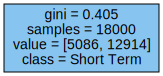

In [67]:
clf_gini=DecisionTreeClassifier(criterion='gini', max_depth=100, max_features='auto', ccp_alpha = 0.1)
rst_gini = cross_validate(clf_gini, x, y, cv=10, scoring='accuracy', return_estimator=True)
# get fitted trees for each fold
trees_gini = rst_gini['estimator']
# print accuracy scores for each fold
scores_gini = rst_gini['test_score']
print("Test score: ",scores_gini)

# select the best model
clf_gini = trees_gini[1]

# encode labels
labels = le.inverse_transform([0,1])

print('features: ', x.columns.to_list())
print('labels: ', labels)

# DOT data
dot_data_gini = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=x.columns.to_list(),  
                                class_names=labels,
                                filled=True)

# Draw graph
graph_gini = graphviz.Source(dot_data_gini, format="png") 
graph_gini.render("MyDecisionTree_gini_20K")
graph_gini
